# 3. 데이터 전처리 이해와 실무

## 데이터 축소 : 특징 선택

### 특징 선택 (강의교안)
  1. 특징 선택 방안
      - Filter : 특징(변수) 별 통계적 점수 및 순위 기반의 특징 선택
      - Wrapper : 특정 조합을 반복적으로 찾아 최적 틍징 조합 선택
      - Embedded : 모델 학습 성능에 기여한 특징 선택(알고리즘 내장 함수 활용)
      - boruta algorithm : 랜덤변수 생성기반의 유의미하지 않은 특즹을 제거하는 특징 선택 알고리즘

### 실습내용 요약
   - 예제 데이터 활용 기반 Wrapper/Embedded 실습 및 boruta algorithm 실습
   
### 실습 데이터
   - 데이터 : Breast Cancer Wisconcin (Diagnostic)
   
### 실습 시 활용 패키지
   - pandas
   - numpy
   - scikit_learn
   - matplotlib
   - seaborn
   - boruta_py

### Wrapper 기반 특징 선택
   - 원 데이터 내 변수 간 조합을 탐색하여 특징을 선택하는 방안

In [8]:
import numpy as np
import pandas as pd

In [9]:
# Breast Cancer 데이터 활용 기반 실습
# 데이터 로딩
cancer = pd.read_csv("./data/wdbc.data.csv", header=None)
#데이터 컬럼명 지정
cancer.columns = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean'
                 , 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se'
                 , 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se','symmetry_se','fractal_dimension_se', 'radius_worst'
                 , 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst'
                 , 'symmetry_worst', 'fractal_dimension_worst']
# ID를 index화
cancer= cancer.set_index('id')
cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [29]:
#훈련과 테스트셋 나누기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.drop(['diagnosis'], axis=1), cancer[['diagnosis']],
                                                   random_state = 1)

print(X_train.shape)
print(X_test.shape)
y_train.head()

(426, 30)
(143, 30)


,diagnosis
id,
925622,M
8915,B
848406,M
922577,B
891703,B


In [30]:
train_df = pd.merge(X_train, y_train, left_index =True, right_index = True, how = 'inner')
train_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
925622,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.094290,0.2128,0.07152,...,42.79,128.70,915.0,0.14170,0.79170,1.17000,0.23560,0.4089,0.14090,M
8915,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.048190,0.1879,0.05852,...,26.19,109.10,809.8,0.13130,0.30300,0.18040,0.14890,0.2962,0.08472,B
848406,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.052590,0.1586,0.05922,...,30.88,123.40,1138.0,0.14640,0.18710,0.29140,0.16090,0.3029,0.08216,M
922577,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,0.06201,...,21.77,71.12,384.9,0.12850,0.08842,0.04384,0.02381,0.2681,0.07399,B
891703,11.85,17.46,75.54,432.7,0.08372,0.05642,0.02688,0.022800,0.1875,0.05715,...,25.75,84.35,517.8,0.13690,0.17580,0.13160,0.09140,0.3101,0.07007,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866674,19.79,25.12,130.40,1192.0,0.10150,0.15890,0.25450,0.114900,0.2202,0.06113,...,33.58,148.70,1589.0,0.12750,0.38610,0.56730,0.17320,0.3305,0.08465,M
869254,10.75,14.97,68.26,355.3,0.07793,0.05139,0.02251,0.007875,0.1399,0.05688,...,20.72,77.79,441.2,0.10760,0.12230,0.09755,0.03413,0.2300,0.06769,B
859717,17.20,24.52,114.20,929.4,0.10710,0.18300,0.16920,0.079440,0.1927,0.06487,...,33.82,151.60,1681.0,0.15850,0.73940,0.65660,0.18990,0.3313,0.13390,M


In [12]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

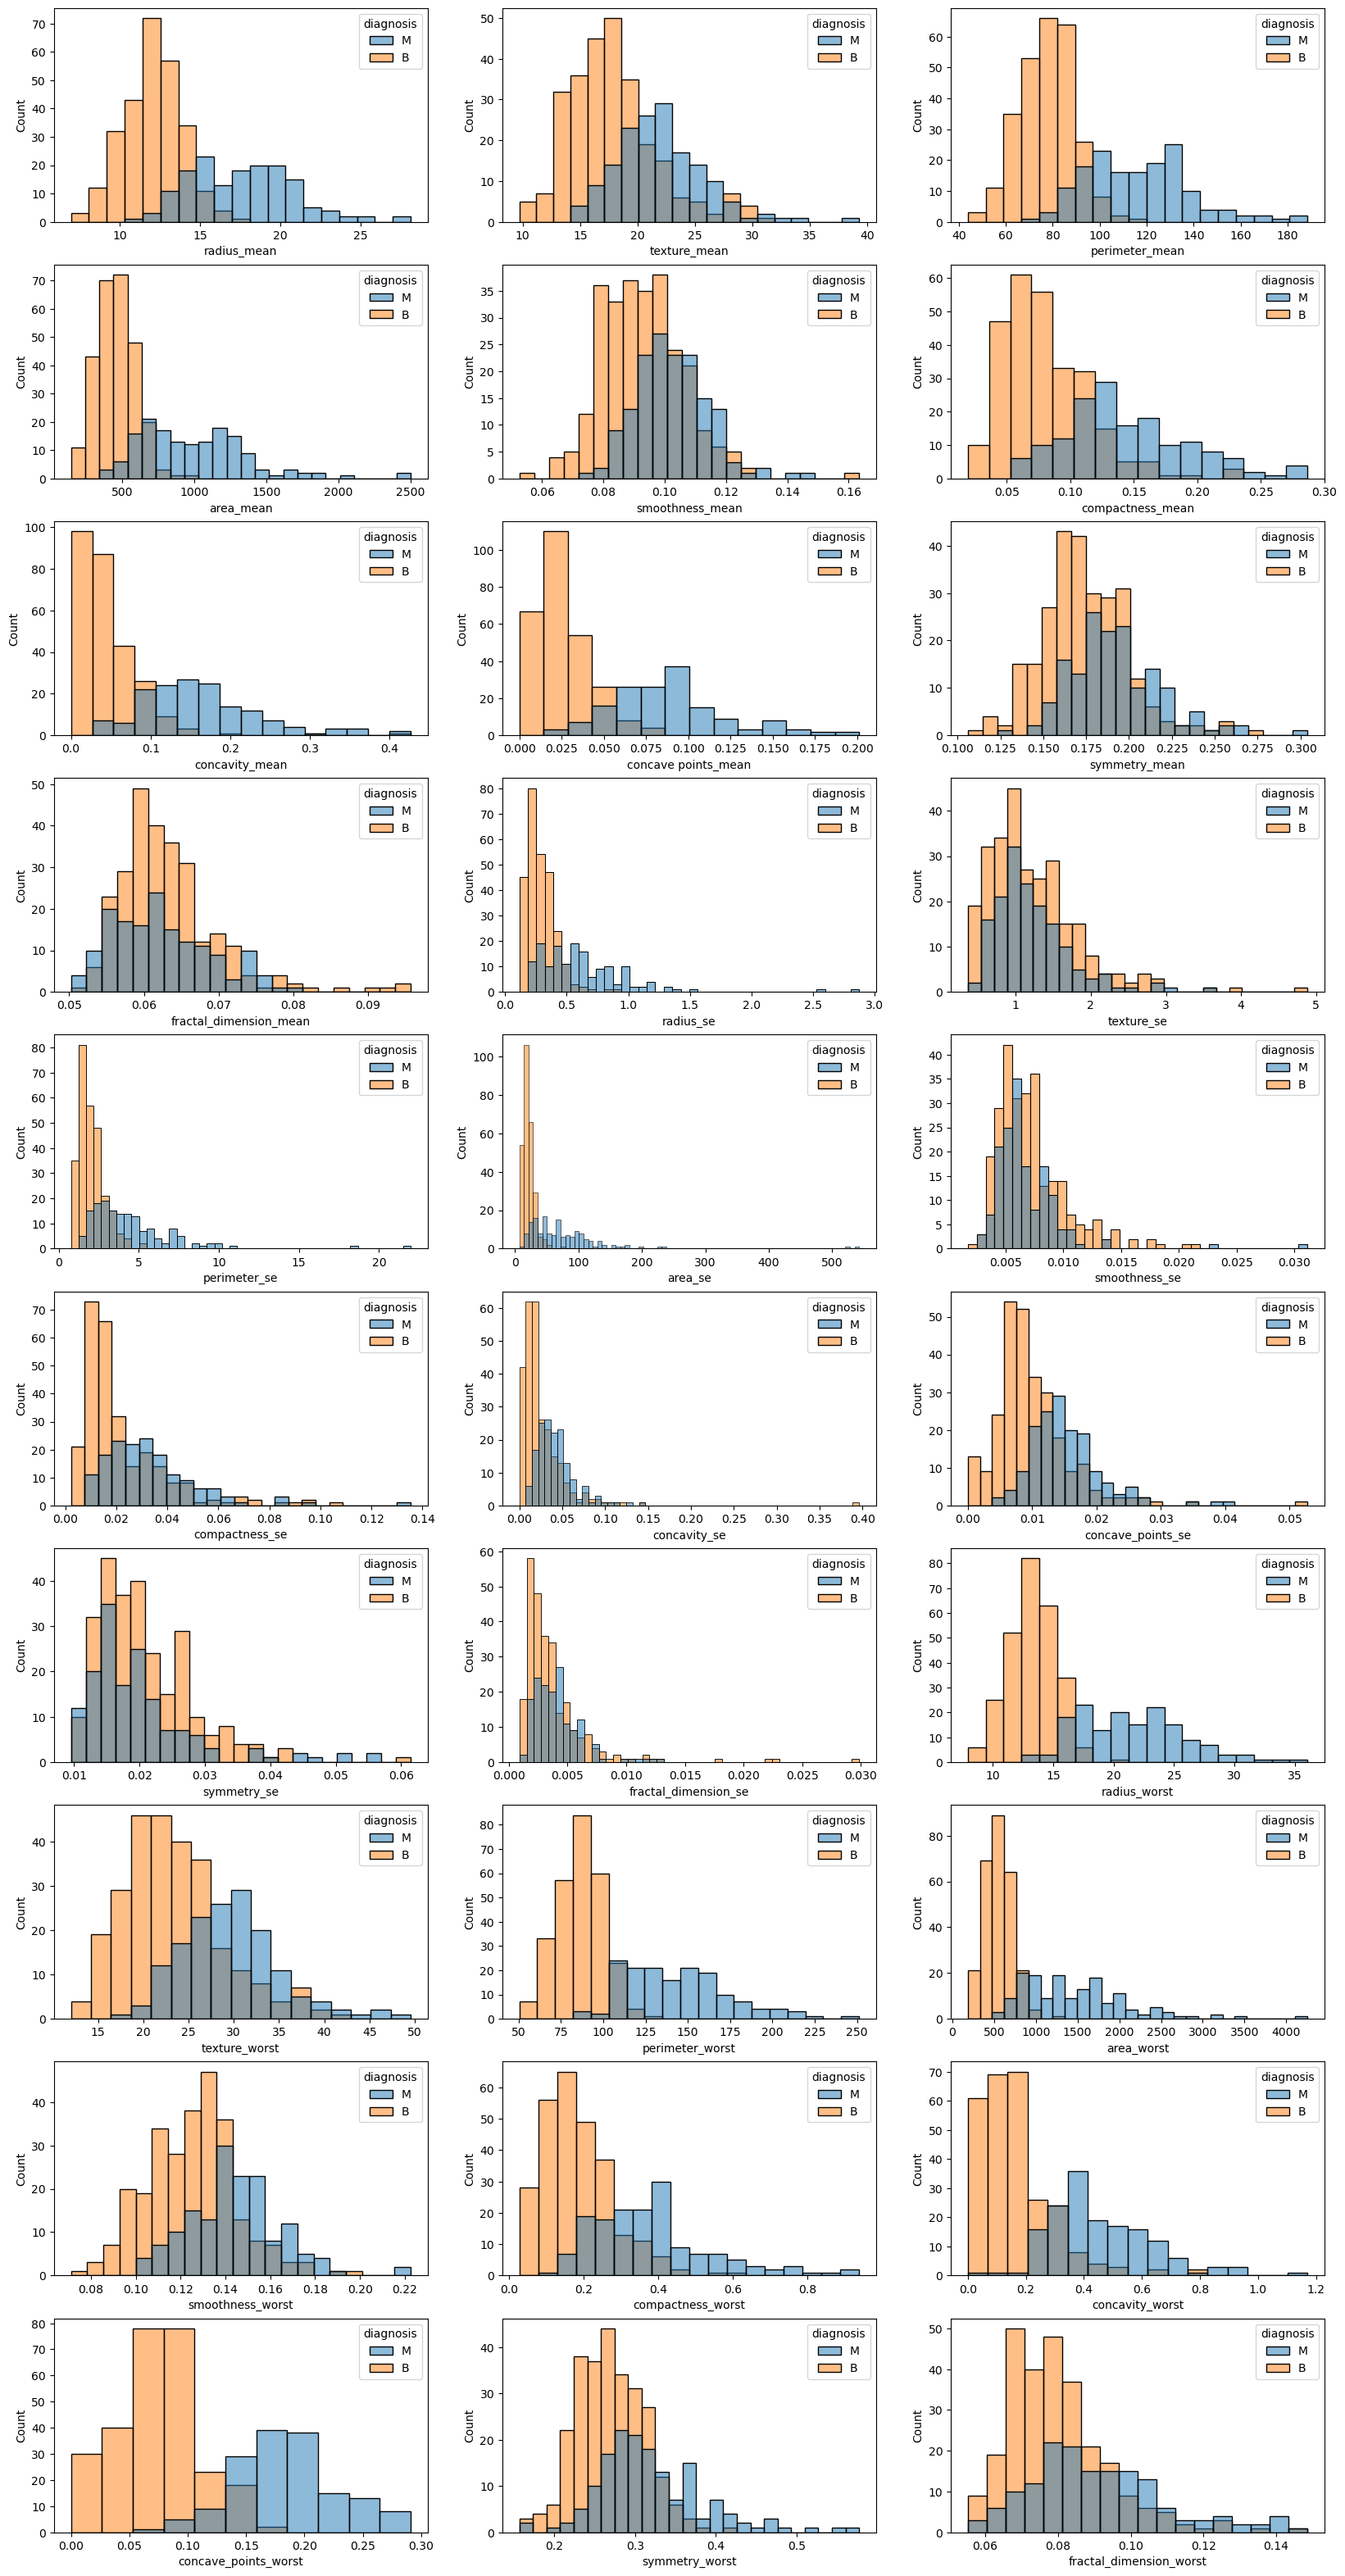

In [13]:
fig, axes = plt.subplots(10, 3, figsize=(20, 40))
axes = axes.flatten()

#히스토그램 사용
for i in range(30):
    sns.histplot(data=train_df, x= train_df.columns[i], hue='diagnosis', multiple='layer', ax=axes[i])
    
plt.show()

## 시각화 기반 특징들의 유의미함 예상

### 유의할 것이라고 예상되는 변수
   - radius_mean,perimeter_mean,area_mean,concaver_point_mean,radius_worst,perimeter_wrost,aera_worst,concaver_point_worst 등
### 유의하지 않을 것이라 예상되는 변수
   - smoothness_mean,symmetry_mean, fractal_dimension_mean,texture_se, smoothness_se, symmetry_se, fractal_dimension_se 등

## RFE 기반 주요 특징 선택

In [14]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

### SVM 기반의 RFE 방식 Referance
#### Guyon, Isabelle, et al."Gene selection for cancer calssification using support vector machines."Machine learning 46.1-3 (2002): 389-422.
  - 위 논문의 SVM 기반의 RFE를 적용하여 대장암과 관련된 유전자 선별을 진행한 연구
  - 4개의 유전자를 최종적으로 선택하여 classification accuracy를 86% 에서 98% 개선하였다고 결과 발표

In [41]:
# SVM 기반 RFE 수행
from sklearn.preprocessing import StandardScaler
# 스테일에 민감한 SVM의 특징에 따라 변수의 scaling을 따로 진행

scaler = StandardScaler()
scaler.fit(X_train)
scale_X_train = scaler.transform(X_train)

In [16]:
# RFE 를 적용한 모델 SVM 지정
estimator_mdl = SVC(kernel='linear')
# SVM 학습 기반의 RFE 실행 및 유의미한 개수 지정 : 5개
svm_rfe = RFE(estimator = estimator_mdl , n_features_to_select=5)

svm_rfe_rst = svm_rfe.fit(scale_X_train, y_train.values.ravel())
svm_rfe_rst.ranking_
# 1로 나온 변수가 유의미한 특징으로 도출된 컬럼

array([17, 23, 11, 16, 20, 25, 14,  9, 21, 13, 12, 24, 18,  1, 15, 10, 22,
        6, 26,  7,  1,  1,  2,  1, 19,  4,  3,  1,  5,  8])

In [17]:
# 도출한 특징 조합으로 test 진행 (예측 결과)
scale_X_test = scaler.transform(X_test)
prediction = pd.DataFrame(svm_rfe.predict(scale_X_test), columns = ['pred_rst'])
prediction

,pred_rst
0,B
1,M
2,B
3,M
4,M
...,...
138,B
139,M
140,M
141,M


In [18]:
#성능확인을위해 타겟 클래스 데이터 수치형 변경
y_test['diagnosis'] = y_test['diagnosis'].replace('M',1)
y_test['diagnosis'] = y_test['diagnosis'].replace('B',0)
prediction['pred_rst'] = prediction['pred_rst'].replace('M',1)
prediction['pred_rst'] = prediction['pred_rst'].replace('B',0)

In [19]:
# 결과 확인
# accuracy
from sklearn.metrics import accuracy_score
print('accuracy :', round(accuracy_score(y_test['diagnosis'], prediction['pred_rst']),5))
# auc
from sklearn.metrics import roc_auc_score
print('auc :', round(roc_auc_score(y_test['diagnosis'],prediction['pred_rst']), 5))

accuracy : 0.95105
auc : 0.94659


In [20]:
# 동일한 SVM RFE 수행하되 10개 특징을 선택 방안으로 실행
estimator_mdl = SVC(kernel='linear')
# SVM 학습 기반의 RFE 실행 및 유의미한 개수 지정 : 10개
re_svm_rfe = RFE(estimator = estimator_mdl , n_features_to_select=10)
re_svm_rfe_rst = re_svm_rfe.fit(scale_X_train, y_train.values.ravel())

re_prediction = pd.DataFrame(re_svm_rfe_rst.predict(scale_X_test), columns = ['pred_rst'])
re_prediction['pred_rst'] = re_prediction['pred_rst'].replace('M',1)
re_prediction['pred_rst'] = re_prediction['pred_rst'].replace('B',0)

# accuracy
print('accuracy :', round(accuracy_score(y_test['diagnosis'], re_prediction['pred_rst']), 5))
# auc
print('auc :', round(roc_auc_score(y_test['diagnosis'],re_prediction['pred_rst']), 5))

accuracy : 0.93706
auc : 0.93523


In [21]:
# 최종 선태된 5개의 특징 컬럼이 어떠한 컬럼인지 확인
chk_var = []
for name, svm_rfe.ranking_ in zip(X_train.columns, svm_rfe_rst.ranking_): # 같이 묶어서 호출
    lst_chk = [name,svm_rfe_rst.ranking_]
    chk_var.append(lst_chk)

chk_svm_rfe = pd.DataFrame(chk_var , columns = ['feature_names', 'svm_rfe_feature'])
chk_svm_rfe = chk_svm_rfe[chk_svm_rfe['svm_rfe_feature']==1]
chk_svm_rfe

,feature_names,svm_rfe_feature
13,area_se,1
20,radius_worst,1
21,texture_worst,1
23,area_worst,1
27,concave_points_worst,1


### 시각화 기반 유의할 것이라고 예상되었던 특징
   - radius_mean,perimeter_mean,area_mean,concaver_point_mean,radius_worst,perimeter_wrost,aera_worst,concaver_point_worst 등

### SVM_RFE 기반 판단
   - 위의 특징 중 radius_worst/ area_worst/ concave_point_worst 등 3개 특징이 포함됨
      - SVM 이외에도 decision tree, logistic regression 등의 알고리즘을 자유롭게 활용하여 RFE 가능
      - RFE 내에서 사용된 모델이 어떤 특징을 선택하고 예측 문제에 대한 성능을 결정하는데 중요한 차이르 만들 수 있음
      

### Embedded 기반 특징 선택
   - 모델 학습 성능에 기여하는 특징 선택하는 방안

In [22]:
#RF 모형 기반 특징 선택
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [23]:
# RF 모형 생성
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state = 1))
embeded_rf_selector.fit(scale_X_train, y_train.values.ravel())

SelectFromModel(estimator=RandomForestClassifier(random_state=1))

In [24]:
# RF 기반 Embedded 특징 선택 결과
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

9 selected features


In [25]:
#선택된 9개의 특징
embeded_rf_feature

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'concave_points_worst']

### 시각화 기반 유의할 것이라고 예상되었던 특징
   - radius_mean,perimeter_mean,area_mean,concaver_point_mean,radius_worst,perimeter_wrost,aera_worst,concaver_point_worst 등
    
### Embedded (Random Forest) 기반 판단
   - 위 특징 중 radius_mean/perimeter_mean/area_mean/concaver_point_mean/radius_worst/perimeter_wrost/aera_wors/,concaver_point_worst 등 8개의 특징이 포함됨

### Boruta Algorithm
   - Boruta Algorithm은 랜덤포레스트 모형 기반 특징 선택 알고리즘
   - 기존 데이터를 임의로 복제하여 랜덤변수(Shadow 변수)를 생성하고 그 보다 낮은 중요도를 지닌 특징을 제외함

In [26]:
from boruta import BorutaPy

In [47]:
#boruta 알고리즘은 랜덤포레스트 모형 기반이므로 먼저 RF 모형 설정
rf = RandomForestClassifier(random_state = 1)

#boruta 기반 특징 선택
boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=1)

# 'auto' 인 경우는 자동으로 데이터셋 사이즈를 고려하여 자동설정

boruta_selector.fit(scale_X_train, y_train.values.ravel())
boruta_selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 5, 1, 5, 1, 1, 7, 1, 1, 1, 6, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2])

In [48]:
# 최종선택된 특징 컬럼이
chk_var_boruta = []
for name, boruta_srank in zip(X_train.columns, boruta_selector.ranking_): #같이 묶어서 호출
    chk_var_boruta.append([name,boruta_srank])
    
chk_boruta = pd.DataFrame(chk_var_boruta, columns = ['feature_names', 'boruta_feature'])
chk_boruta = chk_boruta[chk_boruta['boruta_feature'] == 1]
chk_boruta

,feature_names,boruta_feature
0,radius_mean,1
1,texture_mean,1
2,perimeter_mean,1
3,area_mean,1
4,smoothness_mean,1
5,compactness_mean,1
6,concavity_mean,1
7,concave points_mean,1
10,radius_se,1
12,perimeter_se,1


In [49]:
# Boruta에 의해 선택된 특징 개수
print(np.shape(chk_boruta))

(23, 2)


In [50]:
# 최종 제외된 측징들 리스트확인
chk_boruta = pd.DataFrame(chk_var_boruta, columns = ['feature_names', 'boruta_feature'])
chk_boruta = chk_boruta[chk_boruta['boruta_feature'] != 1]
chk_boruta

,feature_names,boruta_feature
8,symmetry_mean,3
9,fractal_dimension_mean,5
11,texture_se,5
14,smoothness_se,7
18,symmetry_se,6
19,fractal_dimension_se,3
29,fractal_dimension_worst,2


### 유의하지 않을 것이라 예상되는 변수
   - smoothness_mean,symmetry_mean, fractal_dimension_mean,texture_se, smoothness_se, symmetry_se, fractal_dimension_se 등

### Boruta 기반 판단 시
   - symmetry_mean/fractal_dimension_mean/texture_se/smoothness_se/symmetry_se/fractal_dimension_se 등 6개 특징 포함됨